In [1]:
import sys
import os
import tempfile
import json 

import numpy as np
from process_bigraph import pp
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes import CORE
from biosimulator_processes.services.rest_service import BiosimulationsRestService
from biosimulator_processes.instance import generate_ode_instance, plot_ode_output_data
from biosimulator_processes.steps.ode_simulation import CopasiStep, TelluriumStep, AmiciStep

CobraProcess registered successfully as cobra.

CopasiProcess registered successfully as copasi.

TelluriumProcess registered successfully as tellurium.

AmiciProcess registered successfully as amici.

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
CopasiStep registered successfully as copasi-step.

TelluriumStep registered successfully as tellurium-step.

AmiciStep registered successfully as amici-step.

CompositionPlotter registered successfully as plotter.

Plotter2d registered successfully as plotter2d.

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [46]:
import numpy as np 



t2 = np.arange(0, 50, 0.3)


dur = 50
size = 0.3
steps = 167
t = np.linspace(0, dur, steps)


for i, ti in enumerate(t):
    start = t[i - 1] if ti > 0 else ti 
    end = t[i]  
    print(f'{i}: {(start, end)}')

0: (0.0, 0.0)
1: (0.0, 0.30120481927710846)
2: (0.30120481927710846, 0.6024096385542169)
3: (0.6024096385542169, 0.9036144578313254)
4: (0.9036144578313254, 1.2048192771084338)
5: (1.2048192771084338, 1.5060240963855422)
6: (1.5060240963855422, 1.8072289156626509)
7: (1.8072289156626509, 2.108433734939759)
8: (2.108433734939759, 2.4096385542168677)
9: (2.4096385542168677, 2.7108433734939763)
10: (2.7108433734939763, 3.0120481927710845)
11: (3.0120481927710845, 3.313253012048193)
12: (3.313253012048193, 3.6144578313253017)
13: (3.6144578313253017, 3.91566265060241)
14: (3.91566265060241, 4.216867469879518)
15: (4.216867469879518, 4.518072289156627)
16: (4.518072289156627, 4.819277108433735)
17: (4.819277108433735, 5.120481927710844)
18: (5.120481927710844, 5.421686746987953)
19: (5.421686746987953, 5.72289156626506)
20: (5.72289156626506, 6.024096385542169)
21: (6.024096385542169, 6.325301204819278)
22: (6.325301204819278, 6.626506024096386)
23: (6.626506024096386, 6.927710843373495)
24

In [23]:

        

    

omex_dir = '../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'
model_fp = os.path.join(omex_dir, 'Caravagna2010.xml')
ode_process_config = {'model': {'model_source': model_fp}}
step_size = 0.25
duration = 100.0
num_steps = 200.0

In [24]:
200/1000

0.2

In [26]:
# parse expected results


expected_results = parse_expected_results(archive_root=omex_dir)

expected_results


{'duration': 1000.0, 'step_size': 0.2, 'num_steps': 5001}

### Run single `copasi-step`

In [10]:
fp = model_fp
time_config = {
    'duration': 100.0,
    'num_steps': 500.0
}


copasi_step = CopasiStep(sbml_filepath=fp, time_config=time_config)

In [11]:
copasi_step.outputs()

{'time': 'list[float]',
 'floating_species': {'T': 'list[float]',
  'E': 'list[float]',
  'I': 'list[float]'},
 'species_data': {'T': 'list[float]', 'E': 'list[float]', 'I': 'list[float]'}}

In [12]:
copasi_result = copasi_step.update({})

/Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/../biosimulator_processes/steps/ode_simulation.py:178: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [13]:
len(copasi_result['floating_species']['T'])

100

In [14]:
copasi_result['floating_species']['T']

[1.0,
 1.1972136379510068,
 1.7159909970300808,
 2.944630010669373,
 6.049470720734404,
 14.878935878767257,
 43.81117100503571,
 154.423137865475,
 651.2323728576832,
 3276.4758307501056,
 19306.816653639857,
 119305.85318100298,
 545355.66760679,
 1211798.7844858547,
 197263.62502311106,
 5.981708880299588,
 0.009408245948322172,
 0.00047151470103069234,
 0.0002702692582761044,
 0.0008252531963687127,
 0.0078069492131168546,
 0.1585146614908428,
 5.444822843052037,
 272.7300223661204,
 17731.67357036417,
 608055.8002978502,
 169039.60460773003,
 0.04120496856510999,
 0.0004940238724884897,
 0.0014014693568917239,
 0.05194399479432223,
 6.560399132831795,
 1541.3283420529522,
 318764.0140924834,
 49215.705167431806,
 0.0035327376948450684,
 0.0006602882512809304,
 0.030960832783936278,
 11.299589908043224,
 9179.85932455424,
 1172021.7979048486,
 0.0562861215750729,
 0.0005368042528201173,
 0.03708556368952035,
 38.47212346438929,
 84909.48229367411,
 6906.110760949406,
 0.00061767668

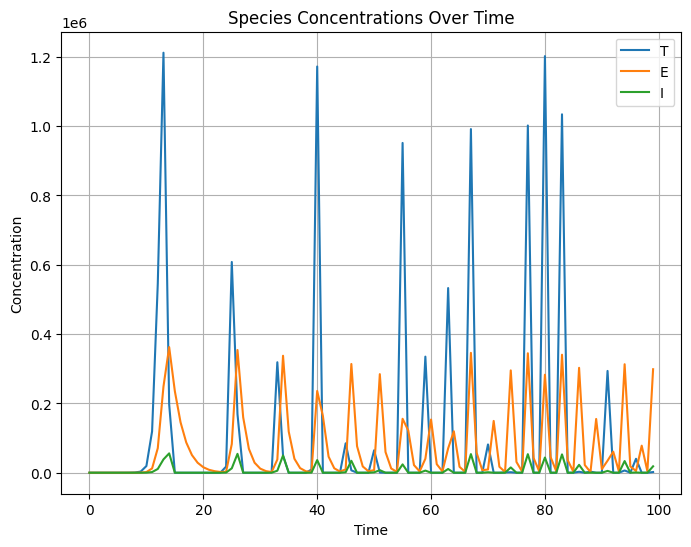

In [15]:
plot_ode_output_data(copasi_result)

In [16]:
from basico import *

m = load_model(model_fp)

get_species(model=m)

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
T,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,0.179997,1.083967e+20,Metabolite_9,T,5.555556,T
E,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,-0.010000,-6.022137e+18,Metabolite_10,E,33.333333,E
I,compartment,reactions,mmol/ml,1.0,6.022141e+20,,,1.0,6.022141e+20,-9.999512,-6.021847e+21,Metabolite_11,I,0.100000,I
